Nombre: Pablo César Méndez Rodas                               
Carnet: 22006487            
Text Mining & Image Recognition, sección L                  
PAPD - Tercer trimestre 2023

# LABORATORIO #1

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

In [42]:
def imagen_canal(imagen, color):
    if color not in [1,2,3,10,20,30]:
        raise ValueError("El parámetro 'color' debe ser 1 (azul) o 2 (verde).")
 
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    alto = imagen.shape[0]
    ancho = imagen.shape[1]

    monocromo = np.zeros((alto,ancho,3))

    for i in range (0,alto):
        for j in range(0,ancho):
            pixel = imagen[i,j]

            #Extraemos canales
            red = pixel[0]
            green = pixel [1]
            blue = pixel [2]

            if color == 1:
                monocromo[i,j] = [0,0,blue]
            elif color == 2:
                monocromo[i,j] = [0,green,0]
            elif color == 3:
                monocromo[i,j] = [red,0,0]
            elif color == 10:
                monocromo[i,j] = [red,green,0]
            elif color == 20:
                monocromo[i,j] = [0,green,blue]
            elif color == 30:
                monocromo[i,j] = [red,0,blue]
    return monocromo
    


In [43]:
img = cv2.imread("laguna.jpeg")
cod = int(input('Ingrese el código del color: '))

arreglo_img = imagen_canal(img,cod)


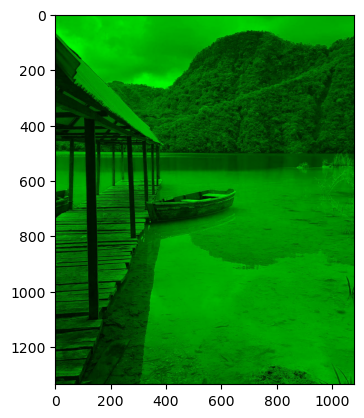